In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
data_raw = pd.read_csv('gas_turbines.csv')
data_raw

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data_raw.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


AT


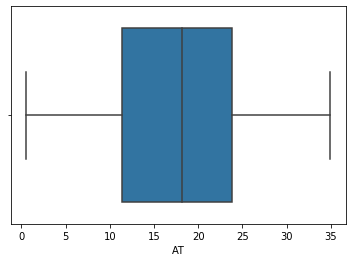

AP


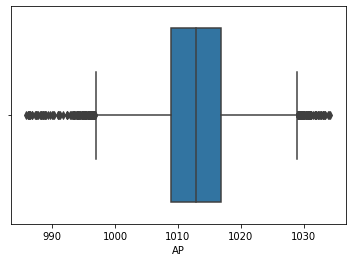

AH


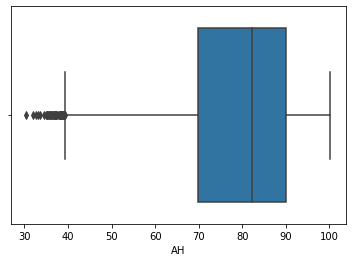

AFDP


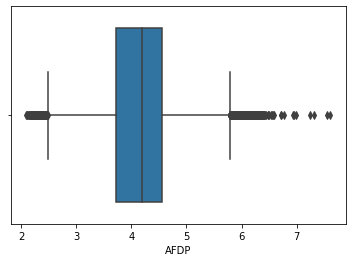

GTEP


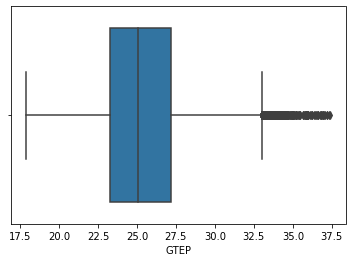

TIT


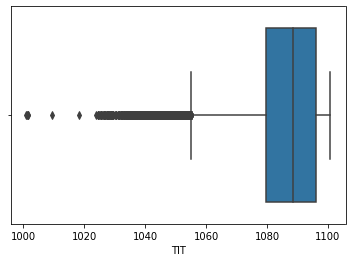

TAT


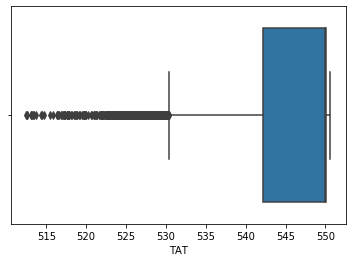

TEY


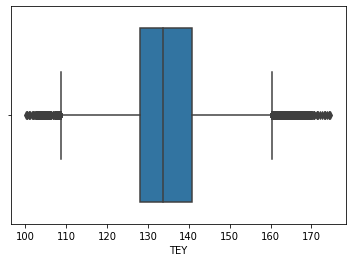

CDP


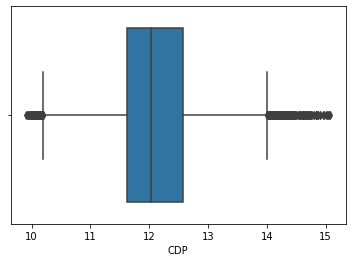

CO


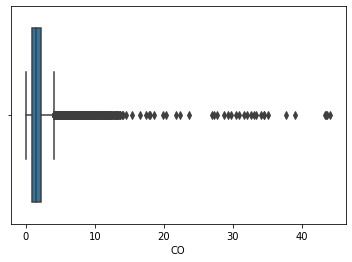

NOX


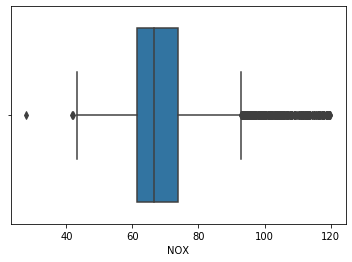

In [5]:
for i in data_raw.columns:
    print(i)
    sns.boxplot(data_raw[i])
    plt.show()

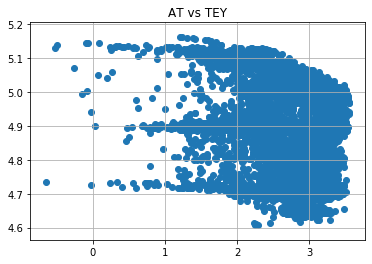

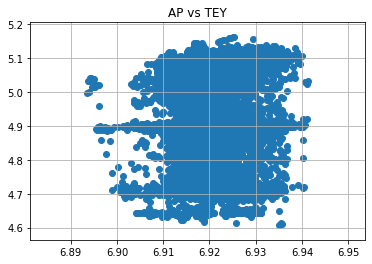

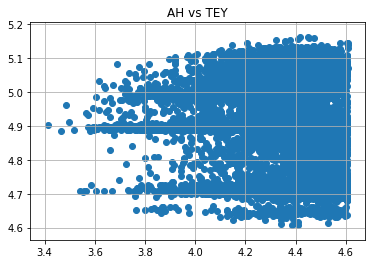

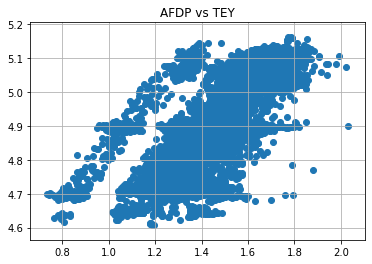

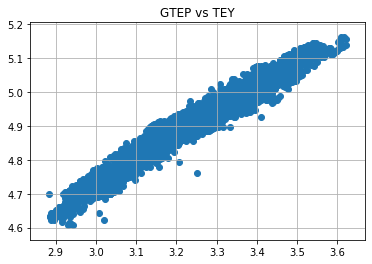

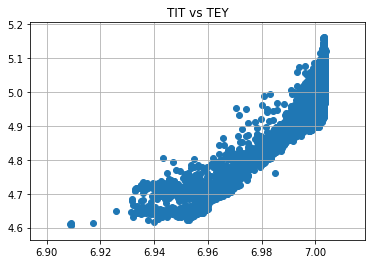

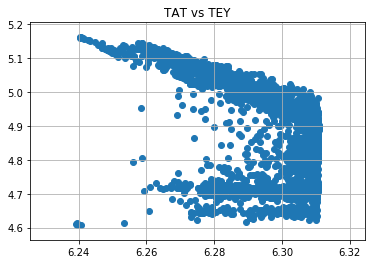

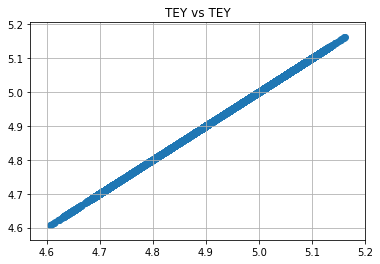

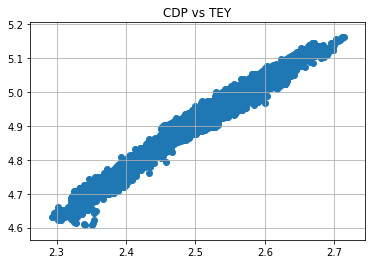

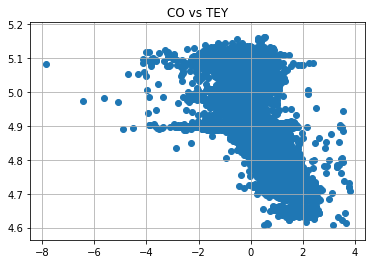

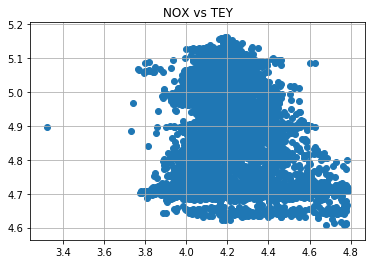

In [6]:
for i in data_raw.columns:
    plt.scatter(np.log(data_raw[i]), np.log(data_raw['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

In [7]:
X = data_raw.drop(columns = ['TEY'], axis = 1) 
y = data_raw.iloc[:,7]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [9]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
    
                                ])

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [11]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
381/381 - 1s - loss: 2800.7451 - mean_squared_error: 2800.7451 - val_loss: 204.6960 - val_mean_squared_error: 204.6960
Epoch 2/50
381/381 - 0s - loss: 108.3281 - mean_squared_error: 108.3281 - val_loss: 77.9941 - val_mean_squared_error: 77.9941
Epoch 3/50
381/381 - 0s - loss: 45.1318 - mean_squared_error: 45.1318 - val_loss: 34.8150 - val_mean_squared_error: 34.8150
Epoch 4/50
381/381 - 0s - loss: 19.1958 - mean_squared_error: 19.1958 - val_loss: 12.6726 - val_mean_squared_error: 12.6726
Epoch 5/50
381/381 - 0s - loss: 7.9982 - mean_squared_error: 7.9982 - val_loss: 5.0153 - val_mean_squared_error: 5.0153
Epoch 6/50
381/381 - 0s - loss: 3.7184 - mean_squared_error: 3.7184 - val_loss: 2.4419 - val_mean_squared_error: 2.4419
Epoch 7/50
381/381 - 0s - loss: 2.2488 - mean_squared_error: 2.2488 - val_loss: 1.5911 - val_mean_squared_error: 1.5911
Epoch 8/50
381/381 - 0s - loss: 1.5230 - mean_squared_error: 1.5230 - val_loss: 1.1598 - val_mean_squared_error: 1.1598
Epoch 9/50
381/3

In [12]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.6039 - mean_squared_error: 0.6039


In [13]:
predictions = model.predict_on_batch(X_test_scaled)

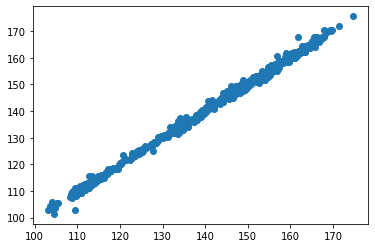

In [14]:
plt.scatter(y_test, predictions)

In [15]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.759216,0.222532
1,111.88,112.169487,0.258748
2,133.72,134.870331,0.860253
3,133.79,134.238586,0.335291
4,110.77,110.378609,0.353337
...,...,...,...
1499,132.85,132.936829,0.065358
1500,125.07,124.520332,0.439488
1501,160.95,161.770920,0.510046
1502,133.12,133.085709,0.025760
